## Import Required Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the data
data = pd.read_csv('DeviceUsageDuration.csv')

In [4]:
data.head()

,Age,Income,SocialMediaSpent,HealthIndex,EntertainmentSpend,StressLevel,UsageDurationMinutes
0,54.967142,89.447489,105.208035,21.760148,157.993476,-111.629322,804.766139
1,48.617357,77.549204,96.223083,21.727523,145.602443,-99.048370,738.494764
2,56.476885,85.013480,107.406831,26.997626,169.574791,-120.136343,836.308584
3,65.230299,94.610764,128.304866,38.278212,199.471938,-131.780958,1013.428822
4,47.658466,74.978816,82.061630,25.498893,132.040532,-92.385616,701.846337


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   float64
 1   Income                1000 non-null   float64
 2   SocialMediaSpent      1000 non-null   float64
 3   HealthIndex           1000 non-null   float64
 4   EntertainmentSpend    1000 non-null   float64
 5   StressLevel           1000 non-null   float64
 6   UsageDurationMinutes  1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


- Age: The age of the individual.
- Income: The income level of the individual.
- SocialMediaSpent: Time spent on social media platforms.
- HealthIndex: A numerical index representing the health status of the individual.
- EntertainmentSpend: Expenditure on entertainment-related activities.
- StressLevel: A measure of the stress level experienced by the individual.
- UsageDurationMinutes: The duration of device usage in minutes.

In [6]:
data.describe()

,Age,Income,SocialMediaSpent,HealthIndex,EntertainmentSpend,StressLevel,UsageDurationMinutes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.193321,75.644162,100.427481,25.040503,150.185773,-100.573592,771.974737
std,9.792159,15.319867,20.902258,5.750188,30.189988,20.017147,152.298044
min,17.587327,29.074770,43.281535,6.079820,57.951517,-176.805304,296.639930
25%,43.524097,65.445690,86.004596,20.918844,130.313727,-113.665277,668.112431
50%,50.253006,75.268684,100.303785,24.929695,149.676263,-100.593203,770.988942
75%,56.479439,85.433390,114.672199,28.942250,169.879215,-86.688553,874.341381
max,88.527315,141.538856,177.049670,45.617333,256.573513,-34.084968,1356.200225


In [7]:
data.isnull().sum()

Age                     0
Income                  0
SocialMediaSpent        0
HealthIndex             0
EntertainmentSpend      0
StressLevel             0
UsageDurationMinutes    0
dtype: int64

## Data Visualization

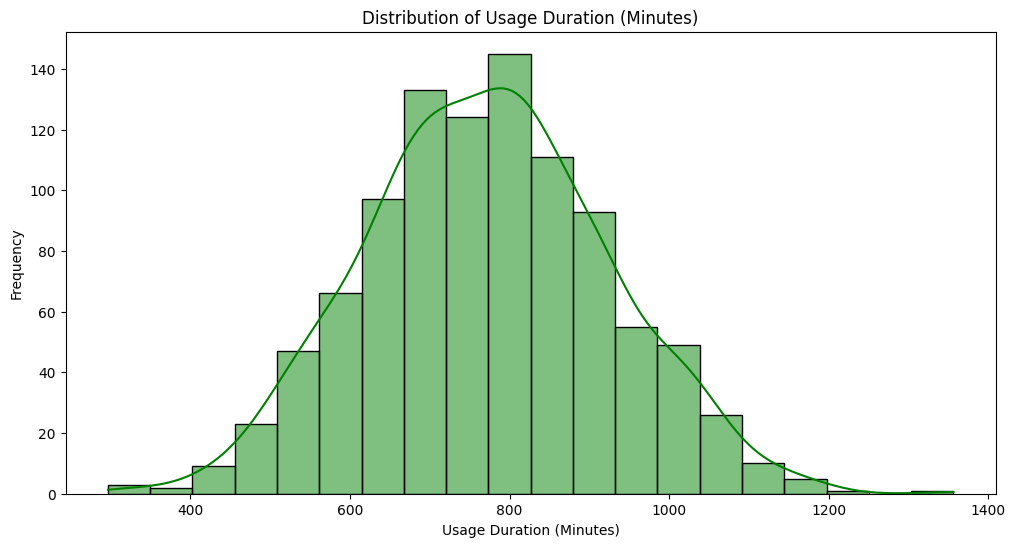

In [8]:
# Visualize the distribution of UsageDurationMinutes
plt.figure(figsize=(12, 6))
sns.histplot(data['UsageDurationMinutes'], bins=20, kde=True, color='green')
plt.title('Distribution of Usage Duration (Minutes)')
plt.xlabel('Usage Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

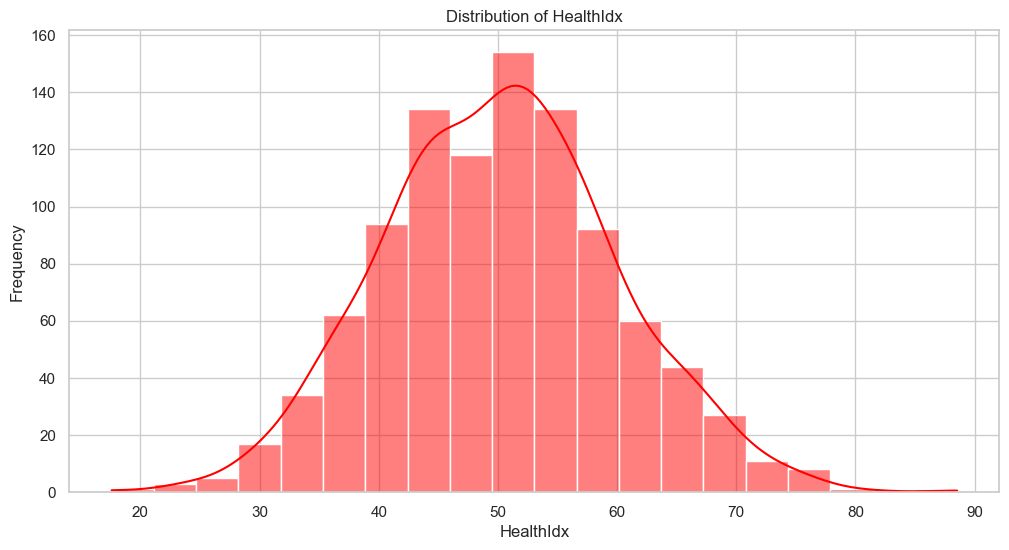

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize the distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='red')
plt.title('Distribution of HealthIdx')
plt.xlabel('HealthIdx')
plt.ylabel('Frequency')
plt.show()

## PairPlots

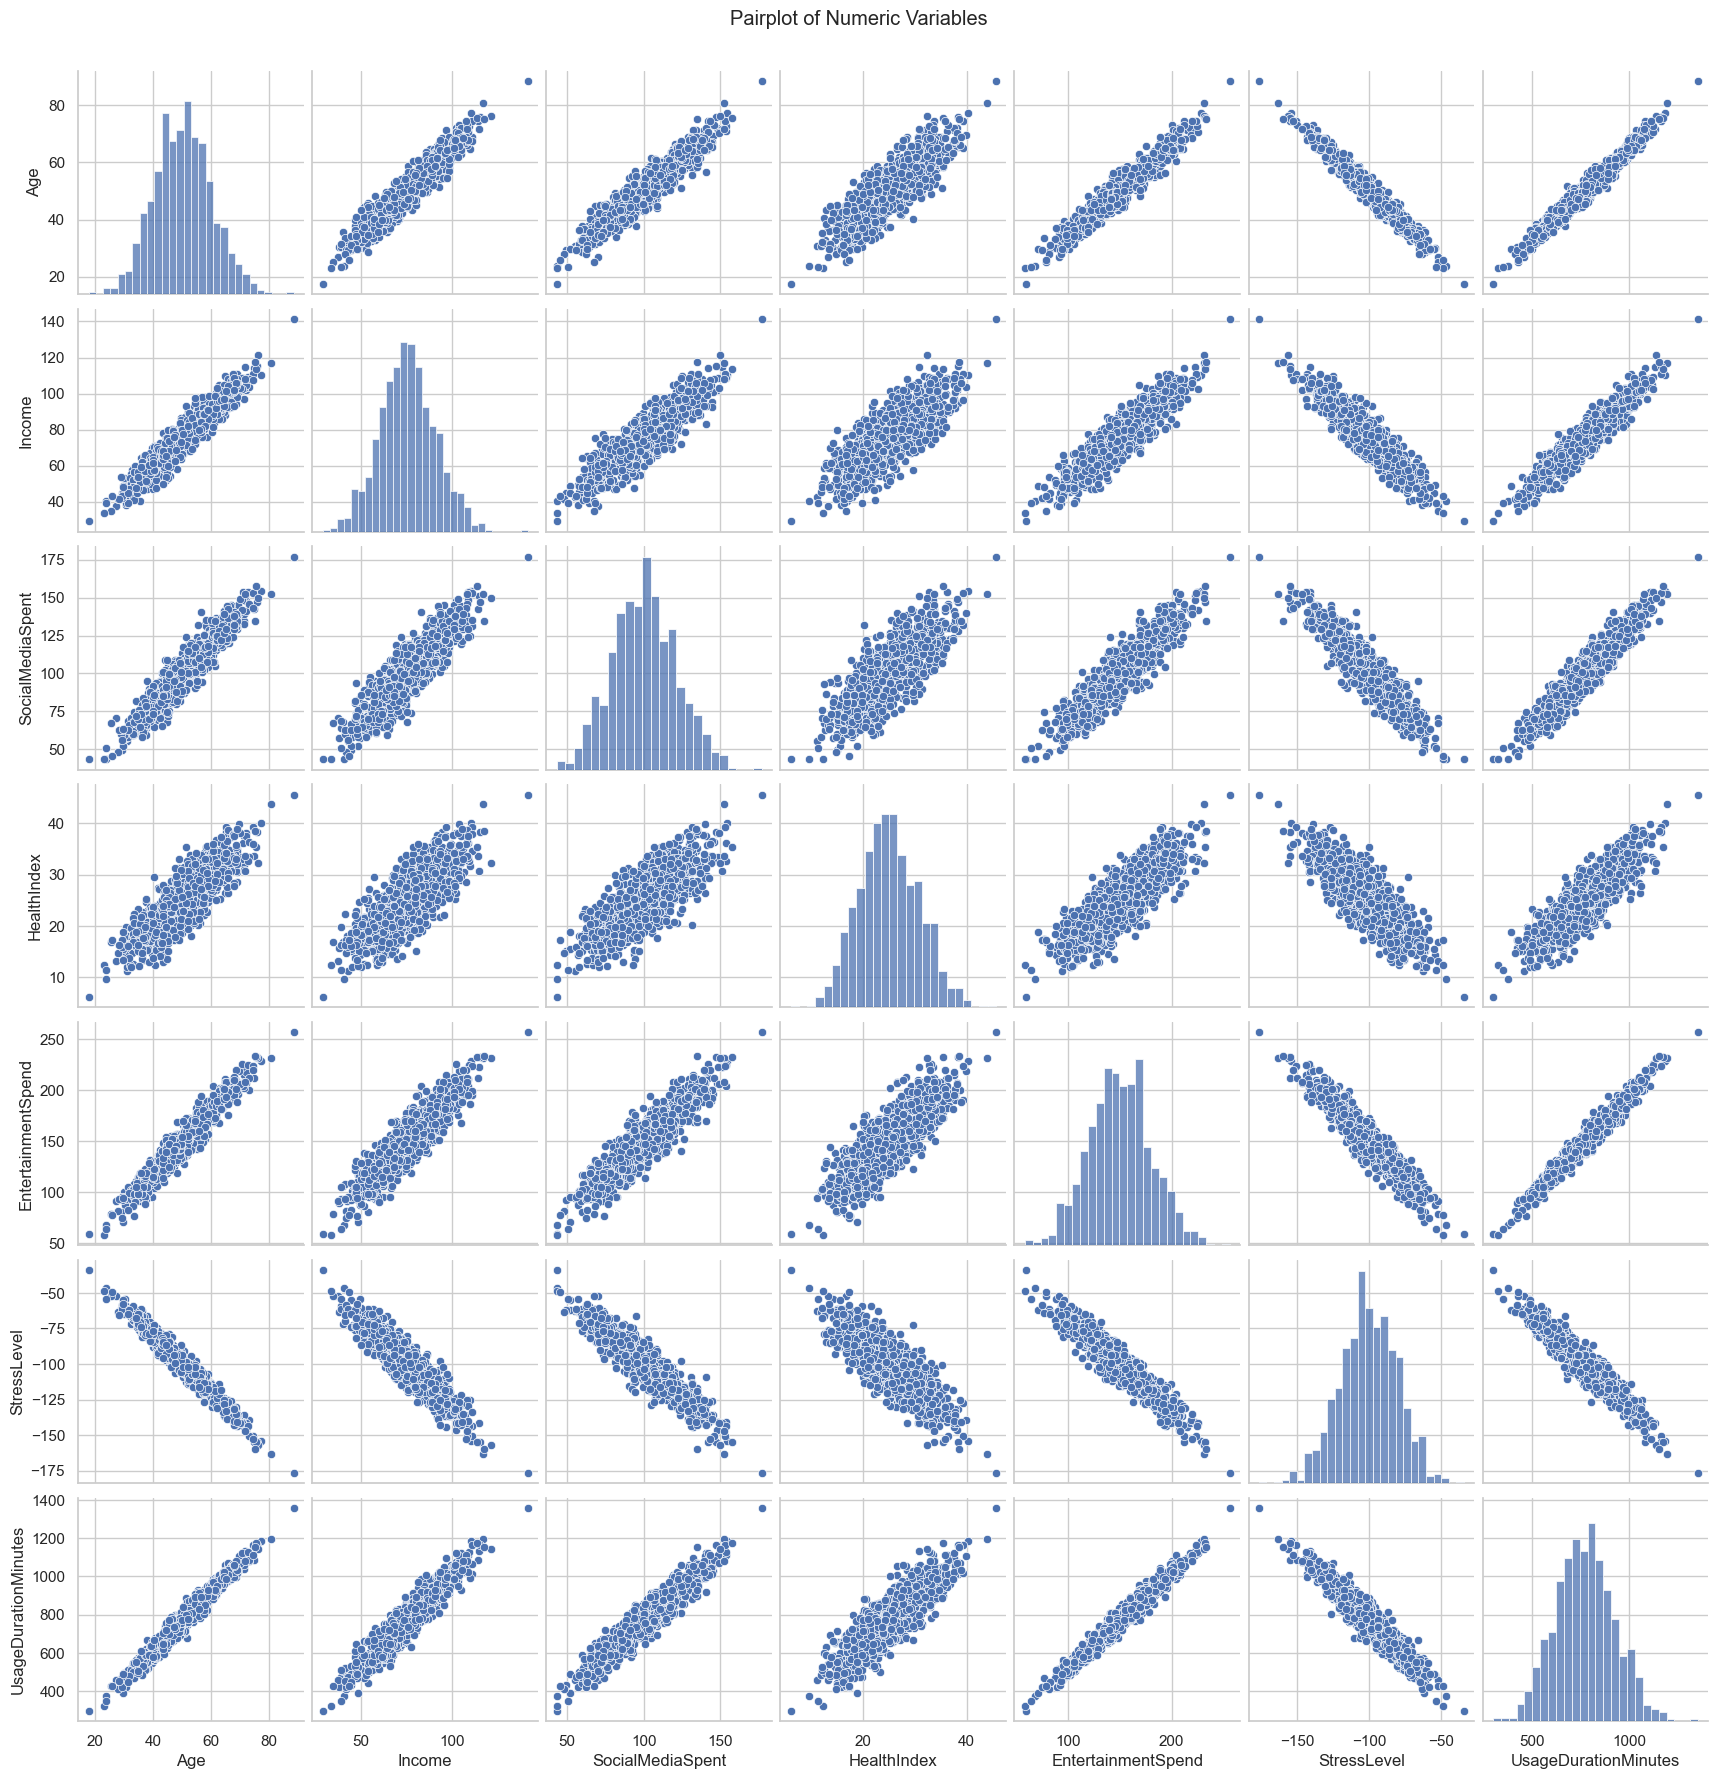

In [10]:
sns.pairplot(data)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


## HeatMaps

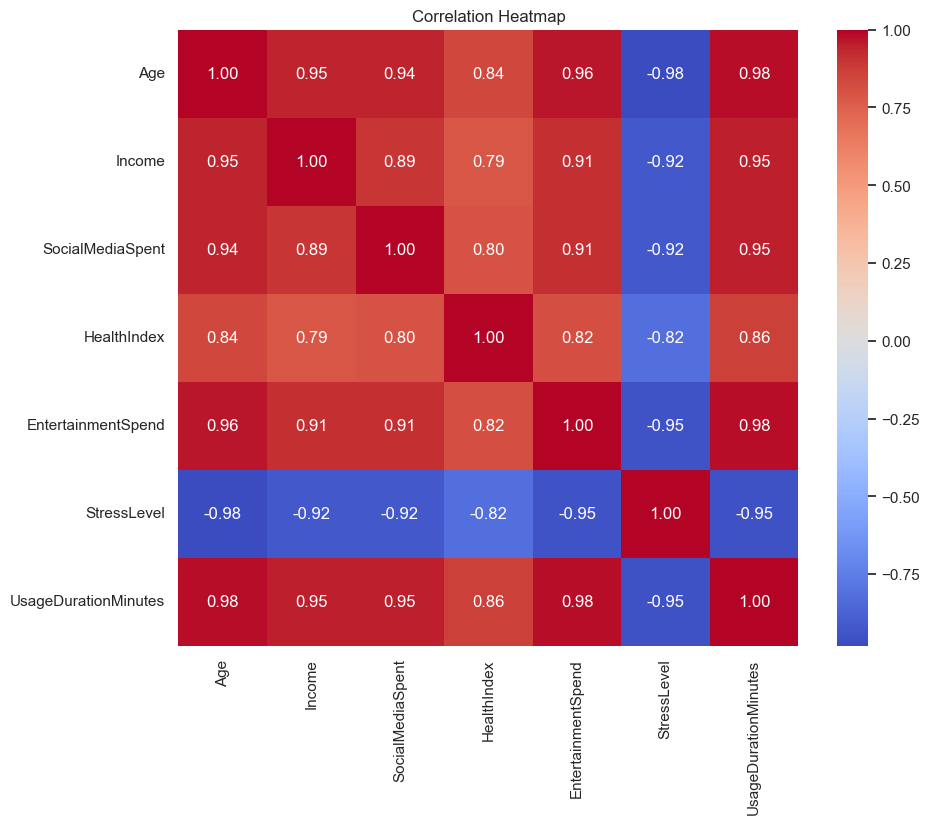

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [12]:
data.head()

,Age,Income,SocialMediaSpent,HealthIndex,EntertainmentSpend,StressLevel,UsageDurationMinutes
0,54.967142,89.447489,105.208035,21.760148,157.993476,-111.629322,804.766139
1,48.617357,77.549204,96.223083,21.727523,145.602443,-99.048370,738.494764
2,56.476885,85.013480,107.406831,26.997626,169.574791,-120.136343,836.308584
3,65.230299,94.610764,128.304866,38.278212,199.471938,-131.780958,1013.428822
4,47.658466,74.978816,82.061630,25.498893,132.040532,-92.385616,701.846337


# Data Preprocessing

## Outlier Detection

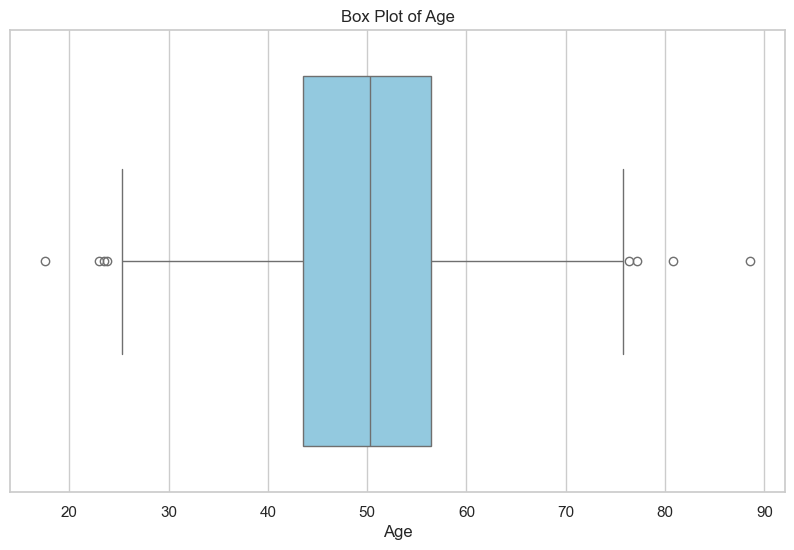

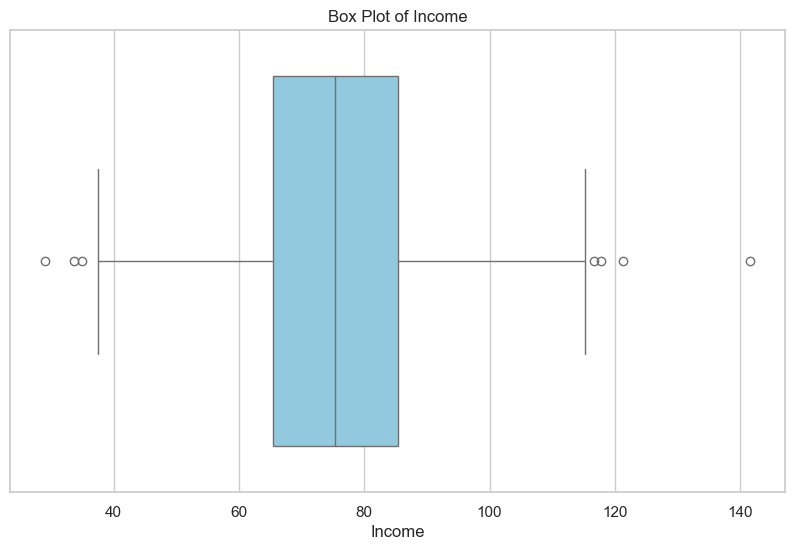

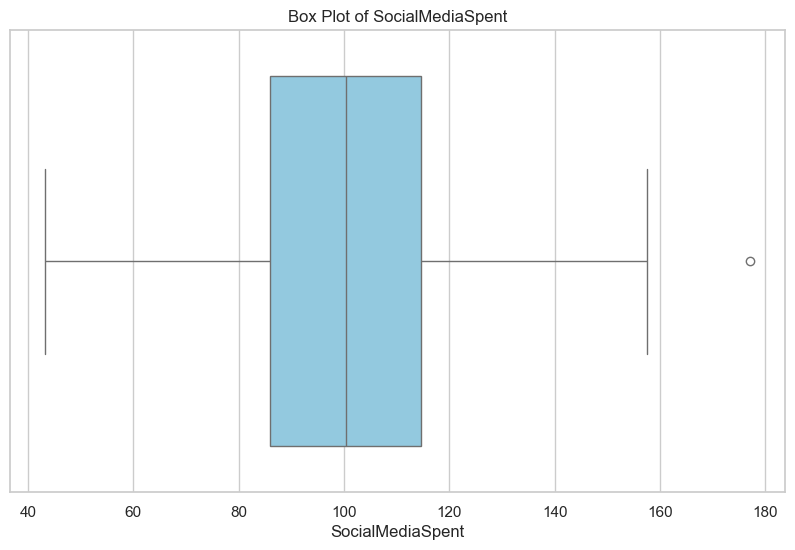

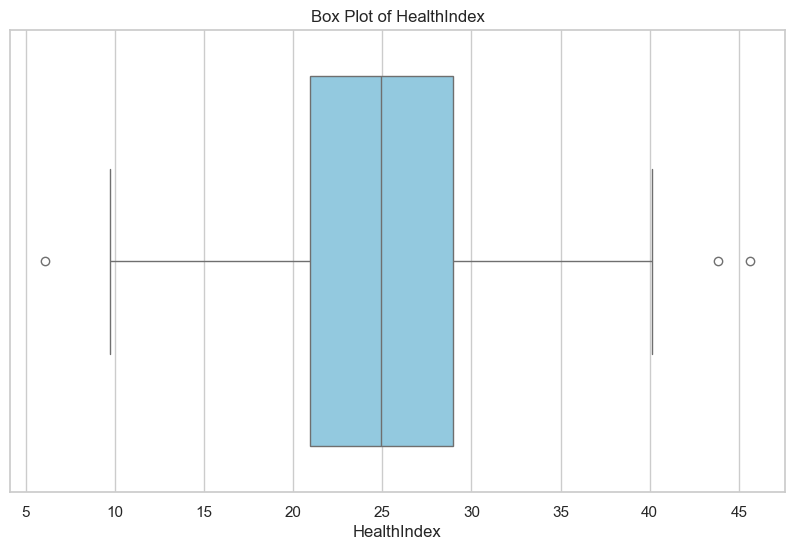

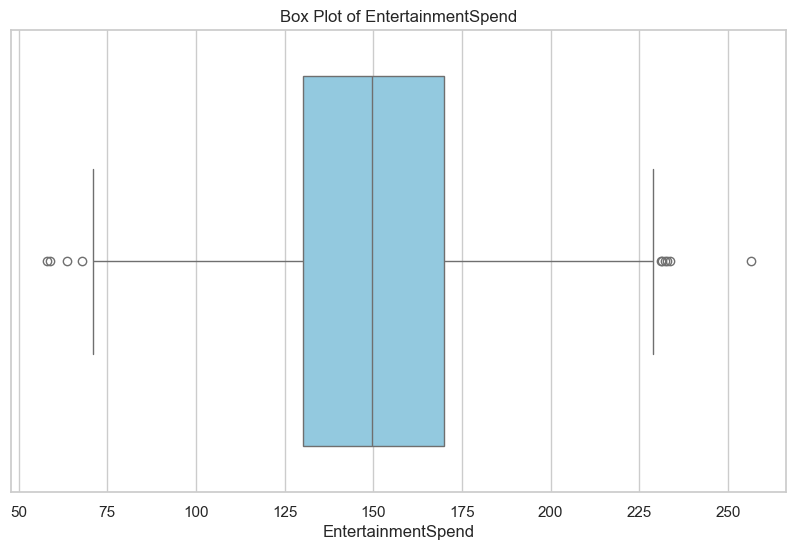

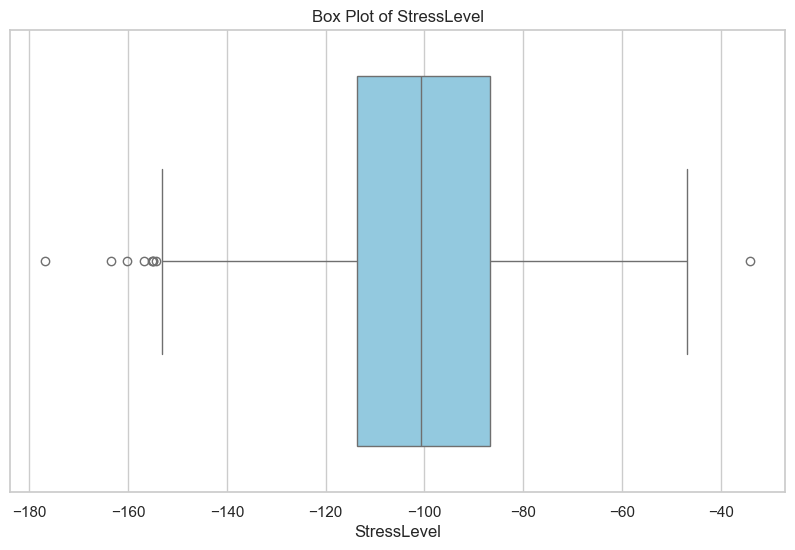

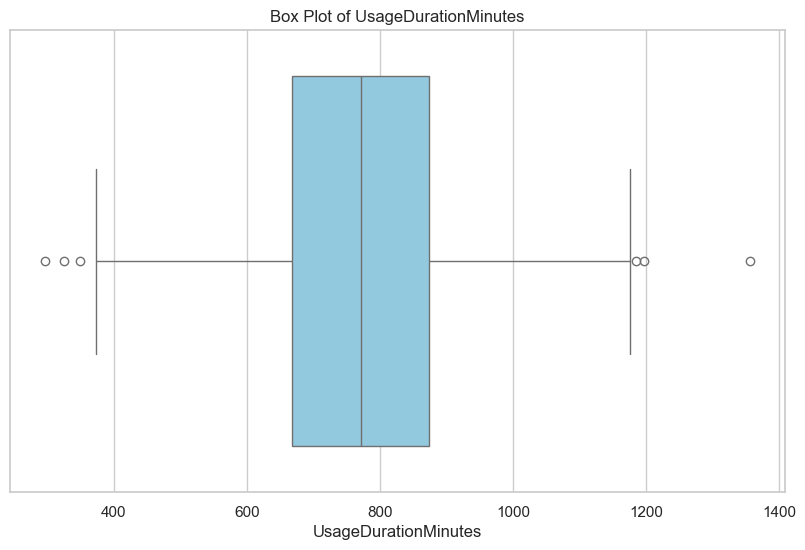

In [13]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


Less Number of Outliers so we can basically ignore those outliers

In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

# Fill missing values with mean
data.fillna(data.mean(), inplace=True)


In [15]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


# Model Building

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
X = data.drop("HealthIndex", axis=1)
y = data["HealthIndex"]

### Train Test Split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# Percentage of Absolute Error (MAPE)
mape_lr = (abs((y_test - y_pred_lr) / y_test)) .mean() * 100

# Print the metrics
print(f"Mean Squared Error (Linear Regression): {mse_lr}")
print(f"Mean Absolute Error (Linear Regression): {mae_lr}")
print(f"R-squared (Linear Regression): {r2_lr}")
print(f"Accuracy of the (Linear Regression): {100 - mape_lr}%")



Mean Squared Error (Linear Regression): 5.004770180904594
Mean Absolute Error (Linear Regression): 1.8084392385952845
R-squared (Linear Regression): 0.8402437381871966
Accuracy of the (Linear Regression): 92.49907240302313%


## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate MAPE for Random Forest
mape_dt = (abs((y_test - y_pred_dt) / y_test)).mean() * 100

print(f"Decision Tree Metrics:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error (decision tree): {mae_dt}")
print(f"R-squared: {r2_dt}")
print(f"Accuracy of the (decision tree): {100 - mape_dt}%")



Decision Tree Metrics:
Mean Squared Error: 16.231258755384026
Mean Absolute Error (decision tree): 3.25671371115
R-squared: 0.4818852555567684
Accuracy of the (decision tree): 86.31080032725367%


## RandomForest

In [22]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
explained_variance_rf=r2_rf
mape_rf = (abs((y_test - y_pred_rf) / y_test)).mean() * 100
print(f"Random Forest Metrics:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")
print(f"Accuracy: {100 - mape_rf}%\n")

Random Forest Metrics:
Mean Squared Error: 8.428628599088581
Mean Absolute Error: 2.3499089279316503
R-squared: 0.7309514426183903
Accuracy: 90.16260476896372%



## Support Vector Machine

In [23]:
# Support Vector Machine (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mape_svr = (abs((y_test - y_pred_svr) / y_test)).mean() * 100
print(f"SVR Metrics:")
print(f"Mean Squared Error: {mse_svr}")
print(f"Mean Absolute Error: {mae_svr}")
print(f"R-squared: {r2_svr}")
print(f"Accuracy: {100 - mape_svr}%")

SVR Metrics:
Mean Squared Error: 10.599157503839074
Mean Absolute Error: 2.4871121841424544
R-squared: 0.6616664262349004
Accuracy: 89.6834117837565%


## Radiant Boost Metrics

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Use a different model name for Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test_scaled)

# Evaluation Metrics for Gradient Boosting
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Metrics:")
print(f"Mean Squared Error: {mse_gradient_boosting}")
print(f"R-squared: {r2_gradient_boosting}\n")

# Accuracy for Gradient Boosting (equivalent to R-squared)
explained_variance_gradient_boosting = gradient_boosting_model.score(X_test_scaled, y_test)
print(f"Accuracy of the Gradient Boosting: {explained_variance_gradient_boosting * 100:.2f}%")


Gradient Boosting Metrics:
Mean Squared Error: 8.58610560738926
R-squared: 0.7259246507262134

Accuracy of the Gradient Boosting: 72.59%


## Advanced Feed Forward Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already prepared

# Create Feedforward Neural Network (FNN) model
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer with 64 neurons, ReLU activation
fnn_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons, ReLU activation
fnn_model.add(Dense(1))  # Output layer
fnn_model.compile(optimizer='adam', loss='mse')  # Compiling model with Adam optimizer and MSE loss function

# Train the FNN model
fnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)  # Training for 50 epochs with batch size of 32

# Predictions for FNN
y_pred_fnn = fnn_model.predict(X_test_scaled).flatten()  # Flattening predictions to match y_test shape

# Evaluation Metrics for FNN
mse_fnn = mean_squared_error(y_test, y_pred_fnn)  # Mean Squared Error
r2_fnn = r2_score(y_test, y_pred_fnn)  # R-squared
print(f"FNN Metrics:")
print(f"Mean Squared Error: {mse_fnn}")
print(f"R-squared: {r2_fnn}")

# Accuracy for FNN (equivalent to R-squared)
explained_variance_fnn = r2_fnn
print(f"Accuracy of the Feed Forward Neural Network (FNN): {explained_variance_fnn * 100:.2f}%")





7/7 [==============================] - 0s 2ms/step
FNN Metrics:
Mean Squared Error: 6.8119635183818765
R-squared: 0.7825566833310249
Accuracy of the Feed Forward Neural Network (FNN): 78.26%


## Inference

# Performance Comparision

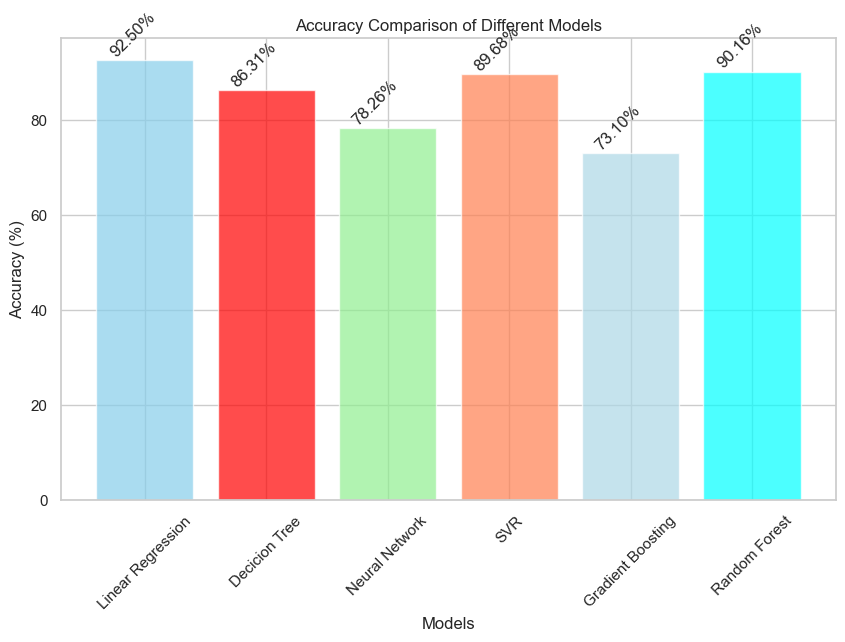

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for all models
accuracy_values = [100 - mape_lr,100 - mape_dt,explained_variance_fnn* 100, 100 - mape_svr,explained_variance_rf* 100, 100 - mape_rf]

models = ['Linear Regression','Decicion Tree', 'Neural Network', 'SVR','Gradient Boosting', 'Random Forest']
colors = ['skyblue','red', 'lightgreen', 'coral', 'lightblue', 'cyan']  # Modified colors

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_values, color=colors, alpha=0.7)

# Add values on top of the bars
for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{value:.2f}%', ha='center', va='bottom', rotation=45)



plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [27]:
import os
import pickle
from tensorflow.keras.models import save_model

# Create 'models' directory if it doesn't exist
models_directory = '/content/drive/MyDrive/Asan Innovators/HealthIdx Effect/models'
os.makedirs(models_directory, exist_ok=True)

# Save Linear Regression Model
with open(os.path.join(models_directory, 'linear_regression_model.pkl'), 'wb') as file:
    pickle.dump(lr_model, file)

#save Decision Tree Model
    with open(os.path.join(models_directory,'decision_tree_model_pkl'),'wb') as file:
        pickle.dump(dt_model,file)
# Save Random Forest Model
with open(os.path.join(models_directory, 'random_forest_model.pkl'), 'wb') as file:
    pickle.dump(rf_model, file)

# Save Support Vector Machine (SVR) Model
with open(os.path.join(models_directory, 'svr_model.pkl'), 'wb') as file:
    pickle.dump(svr_model, file)

# Save Gradient Boosting Regressor Model
with open(os.path.join(models_directory, 'gradient_boosting_model.pkl'), 'wb') as file:
    pickle.dump(gradient_boosting_model, file)

# Save Feedforward Neural Network (FNN) Model
fnn_model.save(os.path.join(models_directory, 'fnn_model.h5'))
